In [1]:
import numpy as np

from time import time
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [2]:
X = np.loadtxt('../data.txt')
Y = np.loadtxt('../label.txt').astype(int)

X = np.nan_to_num(X)
print (X.shape)

(486048, 53)


In [3]:
def trial(X, Y, method, name, scoring='f1'):
    print (name)
    start_time = time()
    method.fit(X, Y)
    y_pred = method.predict(X)
    print ("Done in %.2f s\nV-measure: \t%.4f" % (time() - start_time, v_measure_score(Y, y_pred)))
    print ("F1 score \t%.4f" % (f1_score(Y, y_pred)))

    if (f1_score(Y, y_pred) < 0.2):
        return
    
    print ("Cross validation...")
    start_time = time()
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    if (scoring):
        scores = cross_val_score(method, X, Y, cv=skf, scoring=scoring)
    else:
        scores = cross_val_score(method, X, Y, cv=skf)
    print (scores)
    print ("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print ("Done in %.2f s" % (time() - start_time))

## Mini Batch KMeans

In [4]:
kmeans = MiniBatchKMeans(n_clusters=2, batch_size=2000,
                         random_state=0)

trial(X, Y, kmeans, 'Mini batch k-means', 'adjusted_rand_score')

Mini batch k-means
Done in 0.50 s
V-measure: 	0.1109
F1 score 	0.2671
Cross validation...
[ 0.10636151  0.10793758  0.10595543  0.11099359  0.1038452   0.10708492
  0.10641117  0.1043727   0.10931233  0.10532558]
Accuracy: 0.11 (+/- 0.00)
Done in 4.87 s


## Stochastic Gradient Descent

Cost L2

In [5]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss="hinge", penalty="l2")
trial(X, Y, sgd, 'Stochastic gradient descent SVM')
sgd = SGDClassifier(loss="log", penalty="l2")
trial(X, Y, sgd, 'Stochastic gradient descent Logreg')

Stochastic gradient descent SVM
Done in 0.91 s
V-measure: 	0.1164
F1 score 	0.2822
Cross validation...
[ 0.27078914  0.28592383  0.02590104  0.49845536  0.49845536  0.49845536
  0.25691889  0.27260743  0.28504061  0.49816023]
Accuracy: 0.34 (+/- 0.30)
Done in 9.34 s
Stochastic gradient descent Logreg
Done in 0.89 s
V-measure: 	0.0008
F1 score 	0.0022


In [6]:
sgd = SGDClassifier(loss="log", penalty="elasticnet")
trial(X, Y, sgd, 'Stochastic gradient descent Logreg elasticnet')

Stochastic gradient descent Logreg elasticnet
Done in 1.54 s
V-measure: 	0.0000
F1 score 	0.4984
Cross validation...
[ 0.28825809  0.25628436  0.49845536  0.28388451  0.4981993   0.49845536
  0.27916513  0.28568432  0.11187427  0.49843987]
Accuracy: 0.35 (+/- 0.26)
Done in 16.16 s


## Nearest Neighbors Classification

Based in manifold learning and spectral clustering

In [7]:
from sklearn import neighbors
from sklearn.utils import resample

Xp, Yp = resample(X, Y, n_samples=5000)
nnc = neighbors.KNeighborsClassifier()
trial(Xp, Yp, nnc, 'Nearest neigbors')

Nearest neigbors
Done in 0.67 s
V-measure: 	0.1751
F1 score 	0.5814
Cross validation...
[ 0.34686347  0.39694656  0.38376384  0.36434109  0.32713755  0.38235294
  0.43478261  0.36641221  0.39393939  0.37174721]
Accuracy: 0.38 (+/- 0.06)
Done in 0.85 s


## Kernel SVC

~~El mejor hasta ahora~~

In [8]:
from sklearn.svm import SVC

trial(Xp, Yp, SVC(), 'SVC')

SVC
Done in 3.88 s
V-measure: 	1.0000
F1 score 	1.0000
Cross validation...


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.01219512  0.03614458  0.01219512  0.          0.03614458  0.02424242
  0.01219512  0.02424242  0.01226994  0.04819277]
Accuracy: 0.02 (+/- 0.03)
Done in 18.80 s


## Linear models

In [9]:
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

trial(X, Y, Perceptron(), 'Perceptron')
trial(X, Y, LogisticRegression(), 'Log Reg')

Perceptron
Done in 0.80 s
V-measure: 	0.1160
F1 score 	0.2823
Cross validation...
[ 0.28492059  0.02430831  0.28015769  0.26421725  0.49845536  0.28003366
  0.49817631  0.27126534  0.27138019  0.49843987]
Accuracy: 0.32 (+/- 0.28)
Done in 9.62 s
Log Reg
Done in 2.32 s
V-measure: 	0.1164
F1 score 	0.2822
Cross validation...
[ 0.27981507  0.28266583  0.2794195   0.28935548  0.28698799  0.28670229
  0.27824621  0.27661482  0.2804692   0.28142767]
Accuracy: 0.28 (+/- 0.01)
Done in 22.27 s


In [10]:
%matplotlib inline

def plots(X, y):
    import matplotlib.pyplot as plt
    from sklearn.svm import SVC
    from sklearn.svm import LinearSVC
    from sklearn.model_selection import validation_curve
    
    param_range = np.logspace(-6, -1, 5)
    train_scores, test_scores = validation_curve(
        SVC(), X, y, param_name="gamma", param_range=param_range,
        cv=10, scoring="f1", n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with SVM")
    plt.xlabel("$\gamma$")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    
# plots(Xp, Yp)

## Random

In [11]:
y_pred = np.random.randint(0, 2, Y.shape[0])
print ("f1 score %.4f" % f1_score(Y, y_pred))

f1 score 0.3981


## Visualization

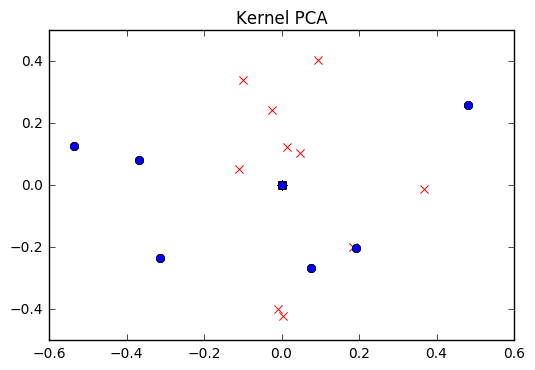

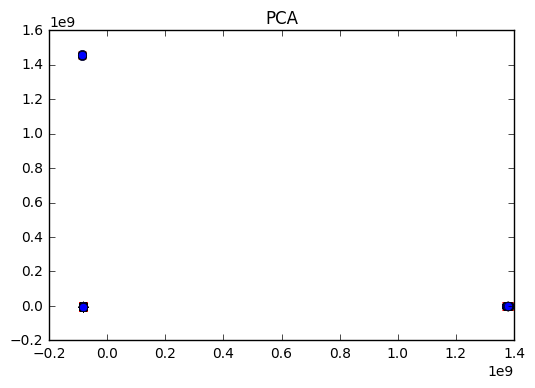

In [50]:
import matplotlib.pyplot as plt
# import seaborn
from sklearn.decomposition import PCA, KernelPCA

Xp, Yp = resample(X, Y, n_samples=5000)
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.001)
X_kpca = kpca.fit_transform(Xp)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xp)
reds = Yp == 0
blues = Yp == 1

plt.plot(X_kpca[reds, 0], X_kpca[reds, 1], "rx")
plt.plot(X_kpca[blues, 0], X_kpca[blues, 1], "bo")
plt.title('Kernel PCA')
plt.show()
plt.plot(X_pca[reds, 0], X_pca[reds, 1], "rx")
plt.plot(X_pca[blues, 0], X_pca[blues, 1], "bo")
plt.title('PCA')
plt.show()

In [13]:
# trial(Xp, Yp, SVC(gamma=0.5), 'SVC')

In [14]:
trial(X, Y, SGDClassifier(loss="log", penalty="l2"), 'sgd log')

sgd log
Done in 1.02 s
V-measure: 	0.1164
F1 score 	0.2822
Cross validation...
[ 0.28472477  0.49845536  0.01742331  0.0208244   0.28183059  0.49845536
  0.26258438  0.49843987  0.49843987  0.49843987]
Accuracy: 0.34 (+/- 0.37)
Done in 10.76 s


In [15]:
from sklearn.kernel_approximation import RBFSampler, Nystroem
from sklearn.linear_model import SGDClassifier

rbf_feature = RBFSampler()
X_features = rbf_feature.fit_transform(X)
clf = SGDClassifier()   
trial(X_features, Y, clf, 'HOpeee')

HOpeee
Done in 1.39 s
V-measure: 	0.0000
F1 score 	0.0000


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
rbf_feature = Nystroem()
X_features = rbf_feature.fit_transform(X)
clf = SGDClassifier()   
trial(X_features, Y, clf, 'HOpeee')
sgd = SGDClassifier(loss="log", penalty="l2")
trial(X_features, Y, sgd, 'Stochastic gradient descent Logreg')

HOpeee
Done in 1.39 s
V-measure: 	0.0000
F1 score 	0.0000
Stochastic gradient descent Logreg


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Done in 1.68 s
V-measure: 	0.0000
F1 score 	0.0000


In [53]:
rbf_feature = Nystroem()
X_features = rbf_feature.fit_transform(Xp)
trial(X_features, Yp, SVC(), 'SVC')

SVC
Done in 4.19 s
V-measure: 	0.0000
F1 score 	0.0000


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-7, activation='relu',
                    hidden_layer_sizes=(100,33), random_state=10)

trial(Xp, Yp, mlp, 'Multi layer perceptron')

Multi layer perceptron
Done in 0.57 s
V-measure: 	0.0000
F1 score 	0.4928
Cross validation...
[ 0.49323308  0.49323308  0.49323308  0.49323308  0.49323308  0.49244713
  0.49244713  0.49244713  0.49244713  0.49244713]
Accuracy: 0.49 (+/- 0.00)
Done in 5.86 s


In [19]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(Xp)  
X_train = scaler.transform(Xp)  
trial(X_train, Yp, mlp, 'Scaled MLP')

Scaled MLP
Done in 1.01 s
V-measure: 	0.1498
F1 score 	0.5300
Cross validation...
[ 0.40754717  0.34980989  0.40143369  0.35338346  0.37837838  0.40304183
  0.43824701  0.49253731  0.43181818  0.36567164]
Accuracy: 0.40 (+/- 0.08)
Done in 9.34 s


In [ ]:
trial(X, Y, mlp, 'Multi layer perceptron')

Multi layer perceptron
Done in 57.01 s
V-measure: 	0.0000
F1 score 	0.4984
Cross validation...


In [1]:
import xgboost as xgb
# xgb.XGBClassifier()
trial(Xp, Yp, xgb.XGBClassifier(), 'xbgoost')

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'trial' is not defined